In [1]:
##Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
#Simple Linear Regression Model


In [3]:
scores_data = pd.read_csv("scores_data.csv")      #read the data.

scores_data.head(10)

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
scores_data.columns

Index(['Hours', 'scores'], dtype='object')

In [5]:
scores_data.dtypes

Hours     float64
scores      int64
dtype: object

In [6]:
scores_data.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


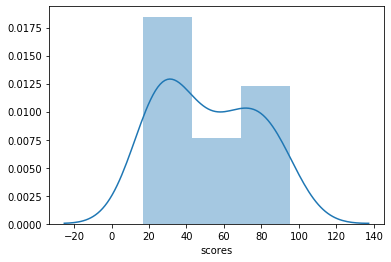

In [7]:
sns.distplot(scores_data["scores"])
plt.show()

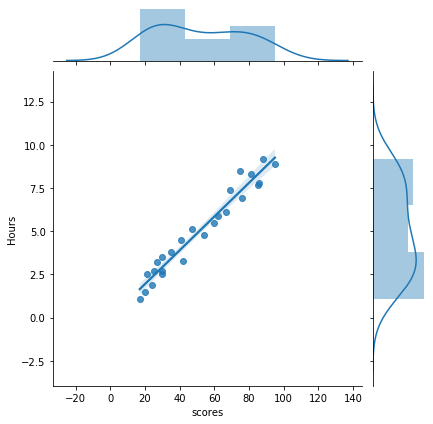

In [8]:
sns.jointplot(x= "scores",y="Hours", kind="reg", data= scores_data)
plt.show()

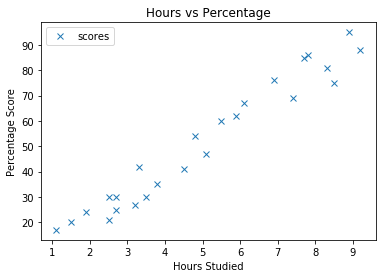

In [9]:
# Plotting the distribution of scores
scores_data.plot(x='Hours', y='scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
X = scores_data.iloc[:, :1].values  
y = scores_data.iloc[:, 1].values  

In [12]:
print(X,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


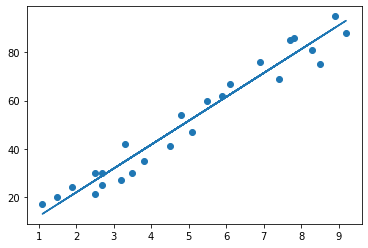

In [15]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
# for calculating at 9.25 hours:
hour=9.25
s=regressor.predict([[hour]])
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(s, hour))




No of Hours = 9.25
Predicted Score = [93.69173249]


In [29]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("R score: ", r2_score(y_test, y_pred))  #amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).

Mean Absolute Error: 4.183859899002975
R score:  0.9454906892105356
